# Explore here

In [2]:
# ! importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

from sklearn.model_selection import train_test_split

import warnings

In [3]:
auser_raw = pd.read_csv('../data/raw/Aquifer_Auser.csv')
auser_raw

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [4]:
auser_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

<Axes: >

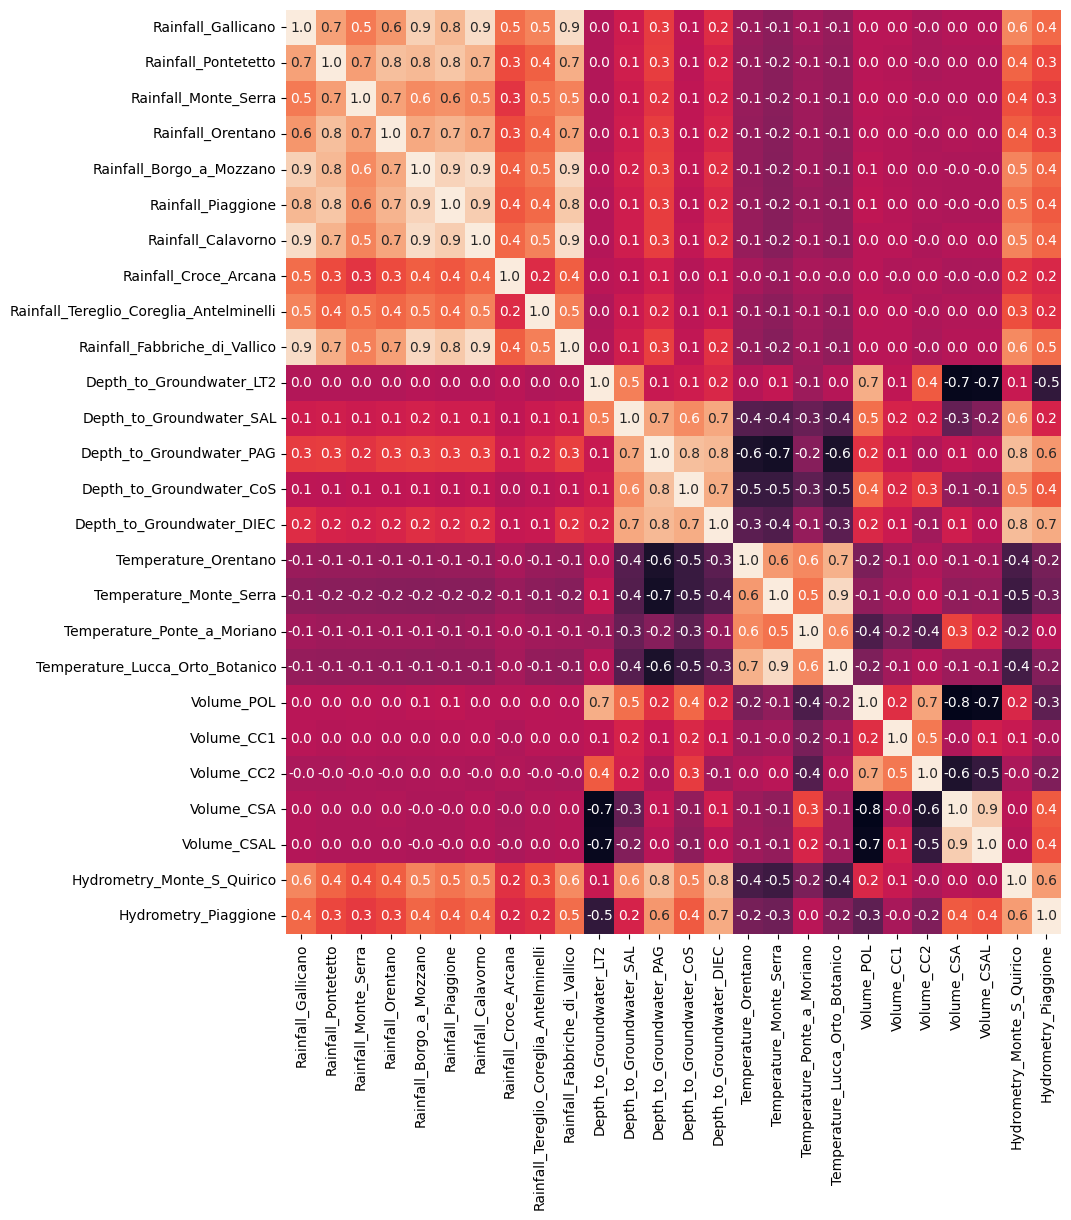

In [5]:
plt.figure(figsize=(10, 12))
no_date = auser_raw.drop('Date', axis=1)
sns.heatmap(no_date.corr(), cbar=False, annot=True, fmt='.1f')


In [6]:

print(len(auser_raw.columns))

27


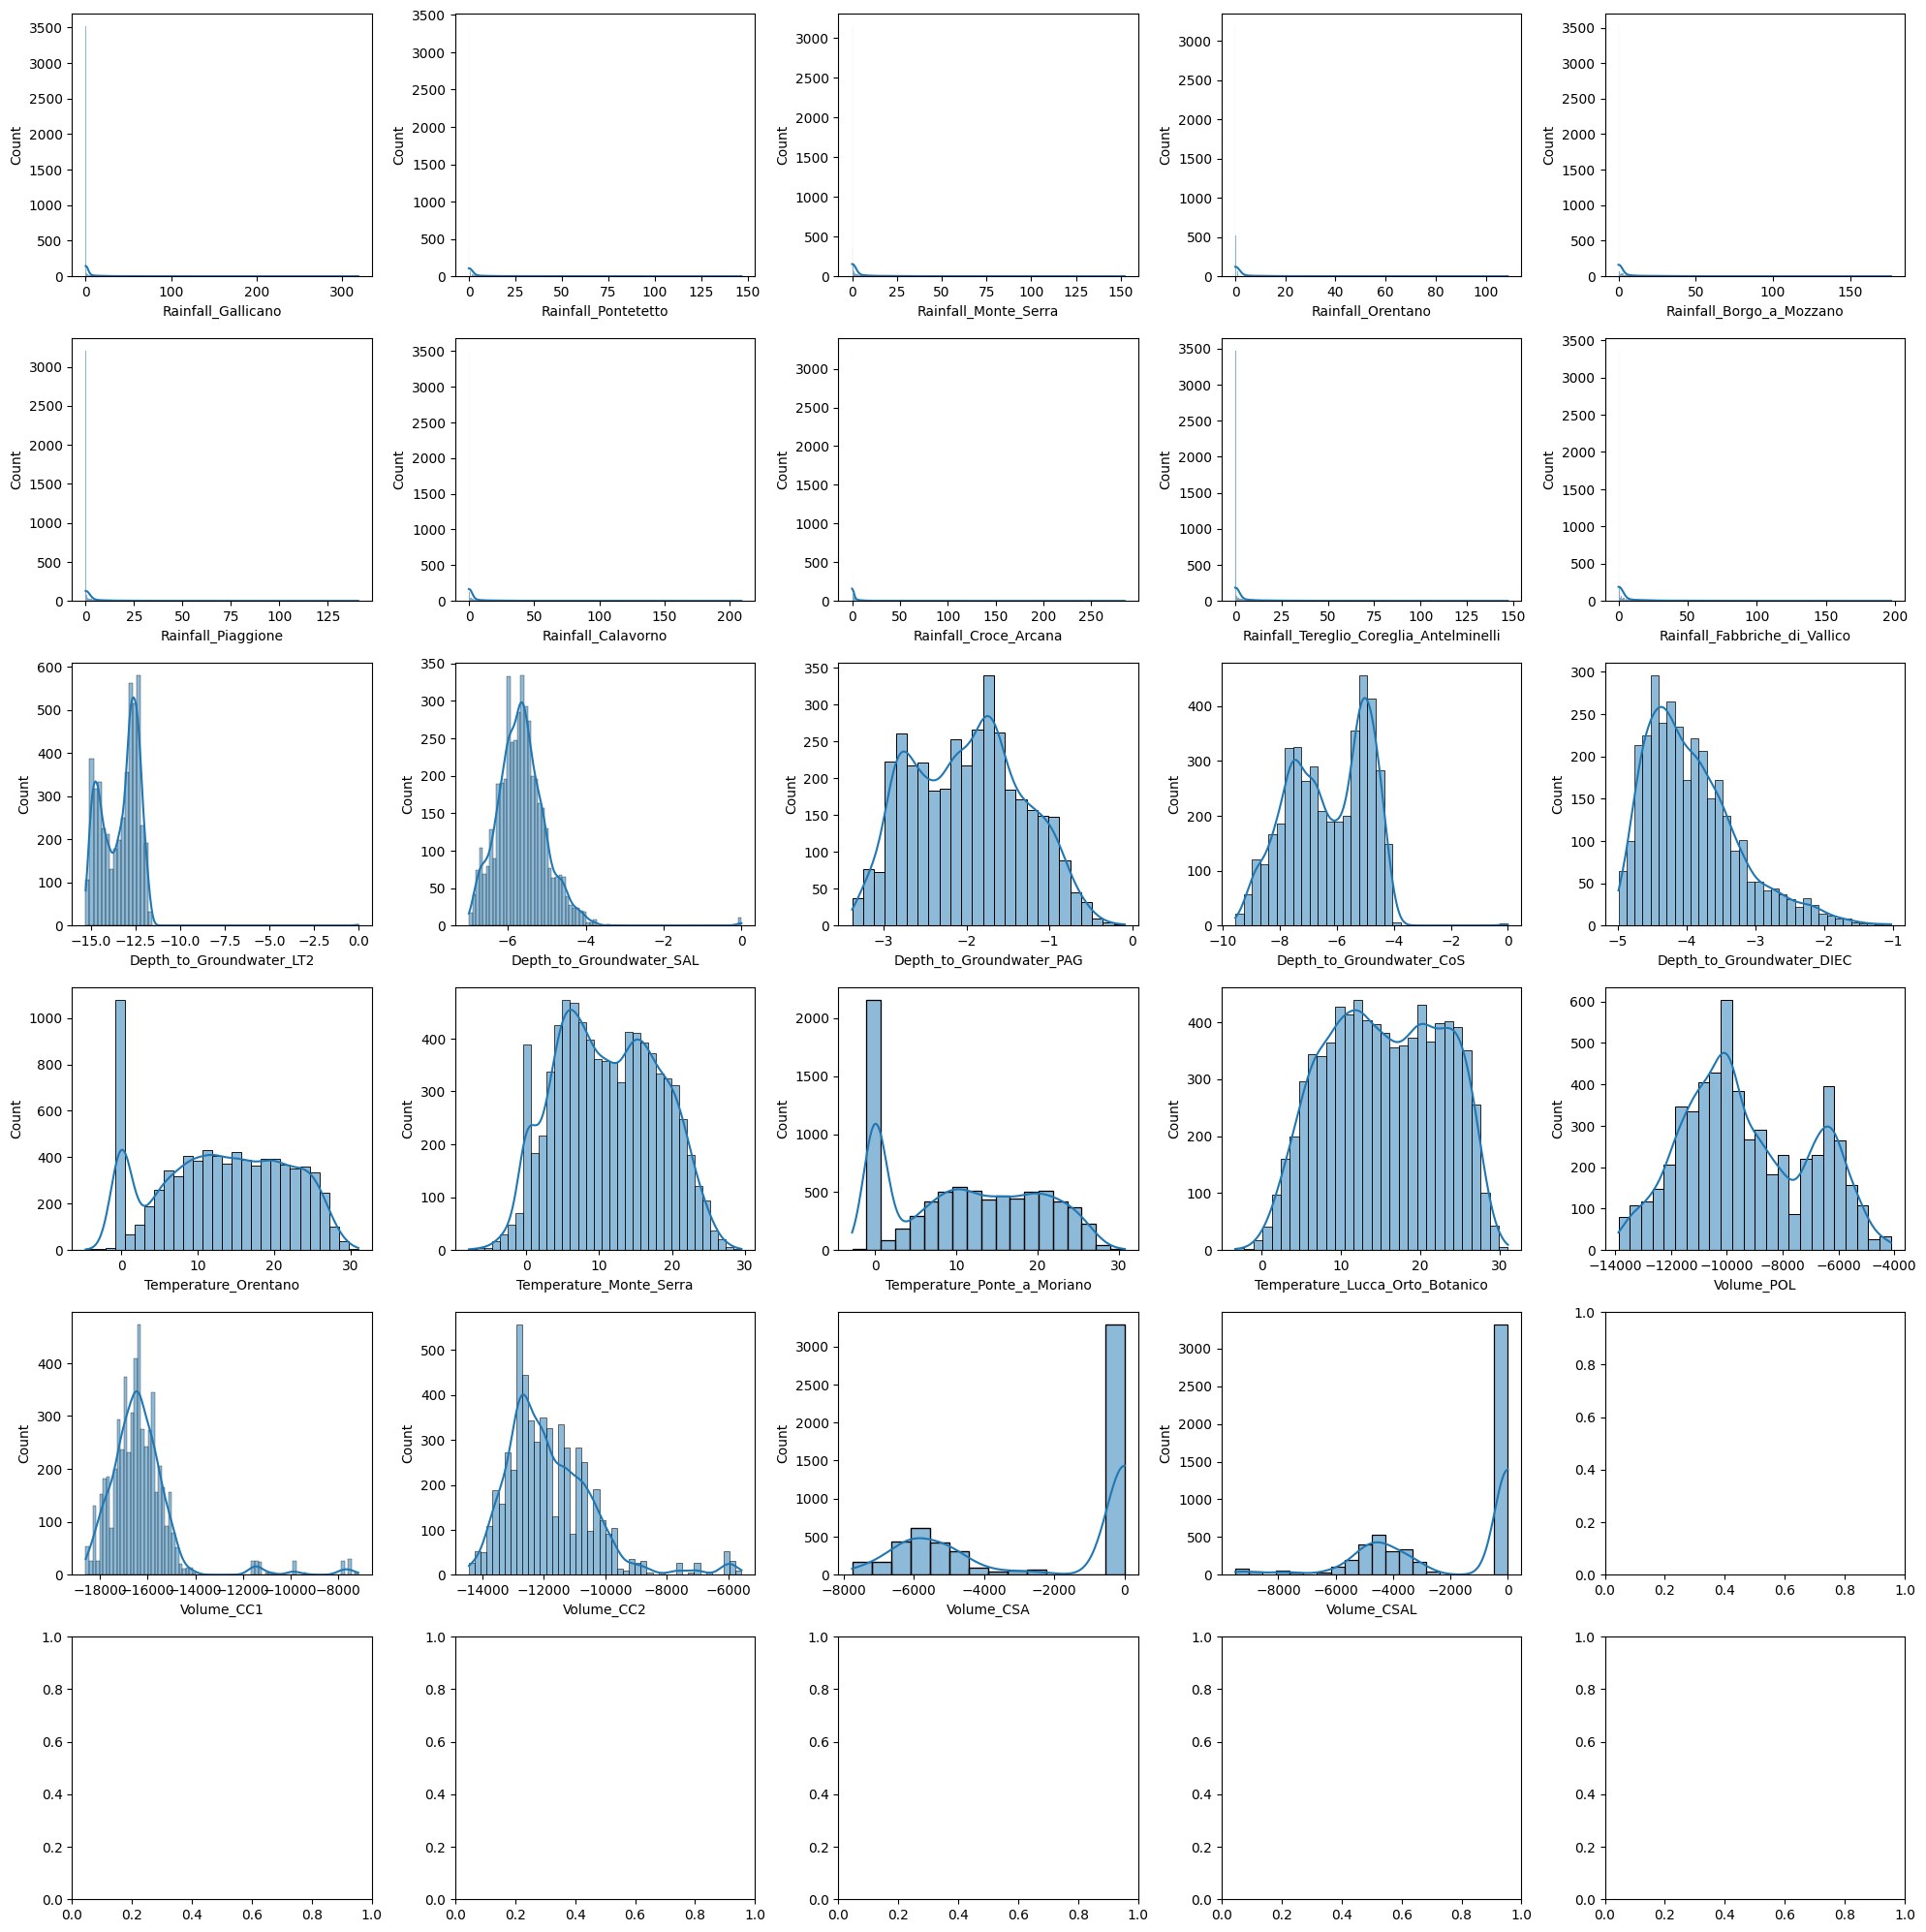

In [7]:
# Define the number of rows and columns you want
n_rows=6
n_cols=5

 
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20, 20)
for i, column in enumerate(no_date.iloc[:, :-2].columns):
    sns.histplot(no_date[column], ax=axes[i//n_cols, i % n_cols], kde=True)
plt.tight_layout()

In [8]:
# plotting each variable with DtG SAL: 
# Create the subplots
n_rows = 6
n_cols = 4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20, 20)
for i, column in enumerate(no_date.iloc[:,:-2].columns):
    sns.regplot(x = no_date[column], y = no_date['Depth_to_Groundwater_SAL'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()

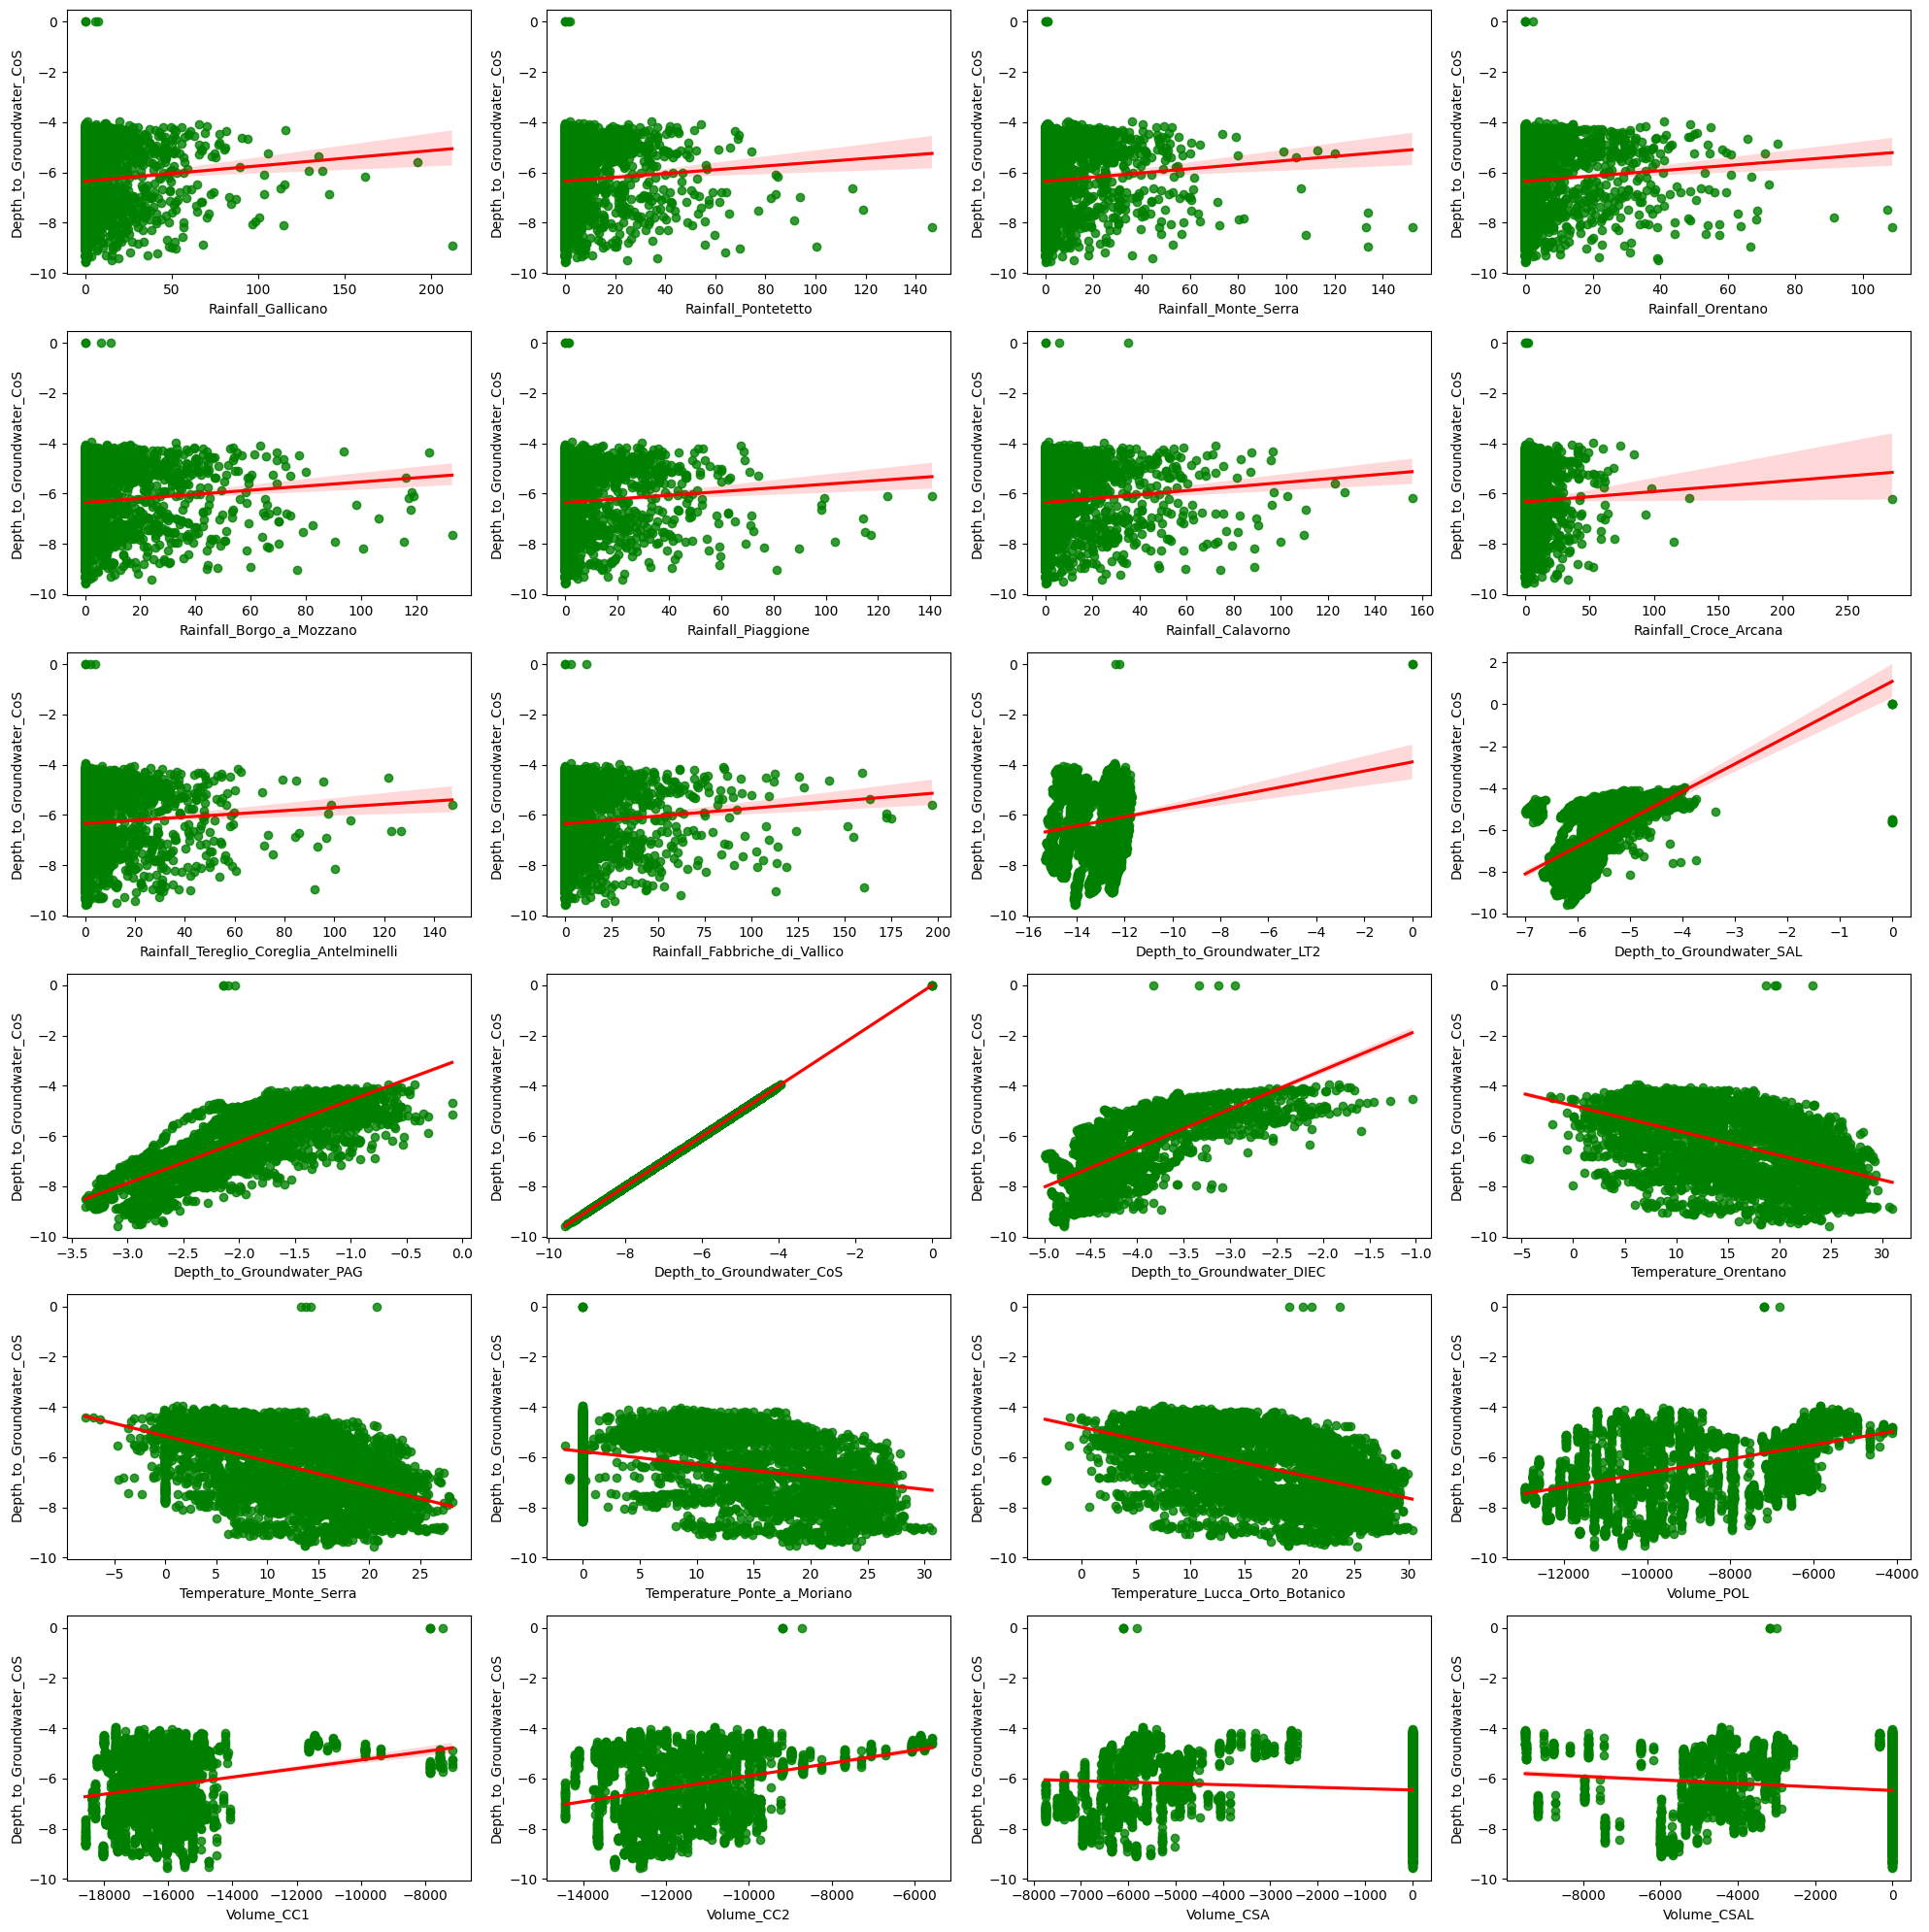

In [ ]:
# plotting each variable with DtG CoS: 
# Create the subplots
n_rows = 6
n_cols = 4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20, 20)
for i, column in enumerate(no_date.iloc[:,:-2].columns):
    sns.regplot(x = no_date[column], y = no_date['Depth_to_Groundwater_CoS'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()

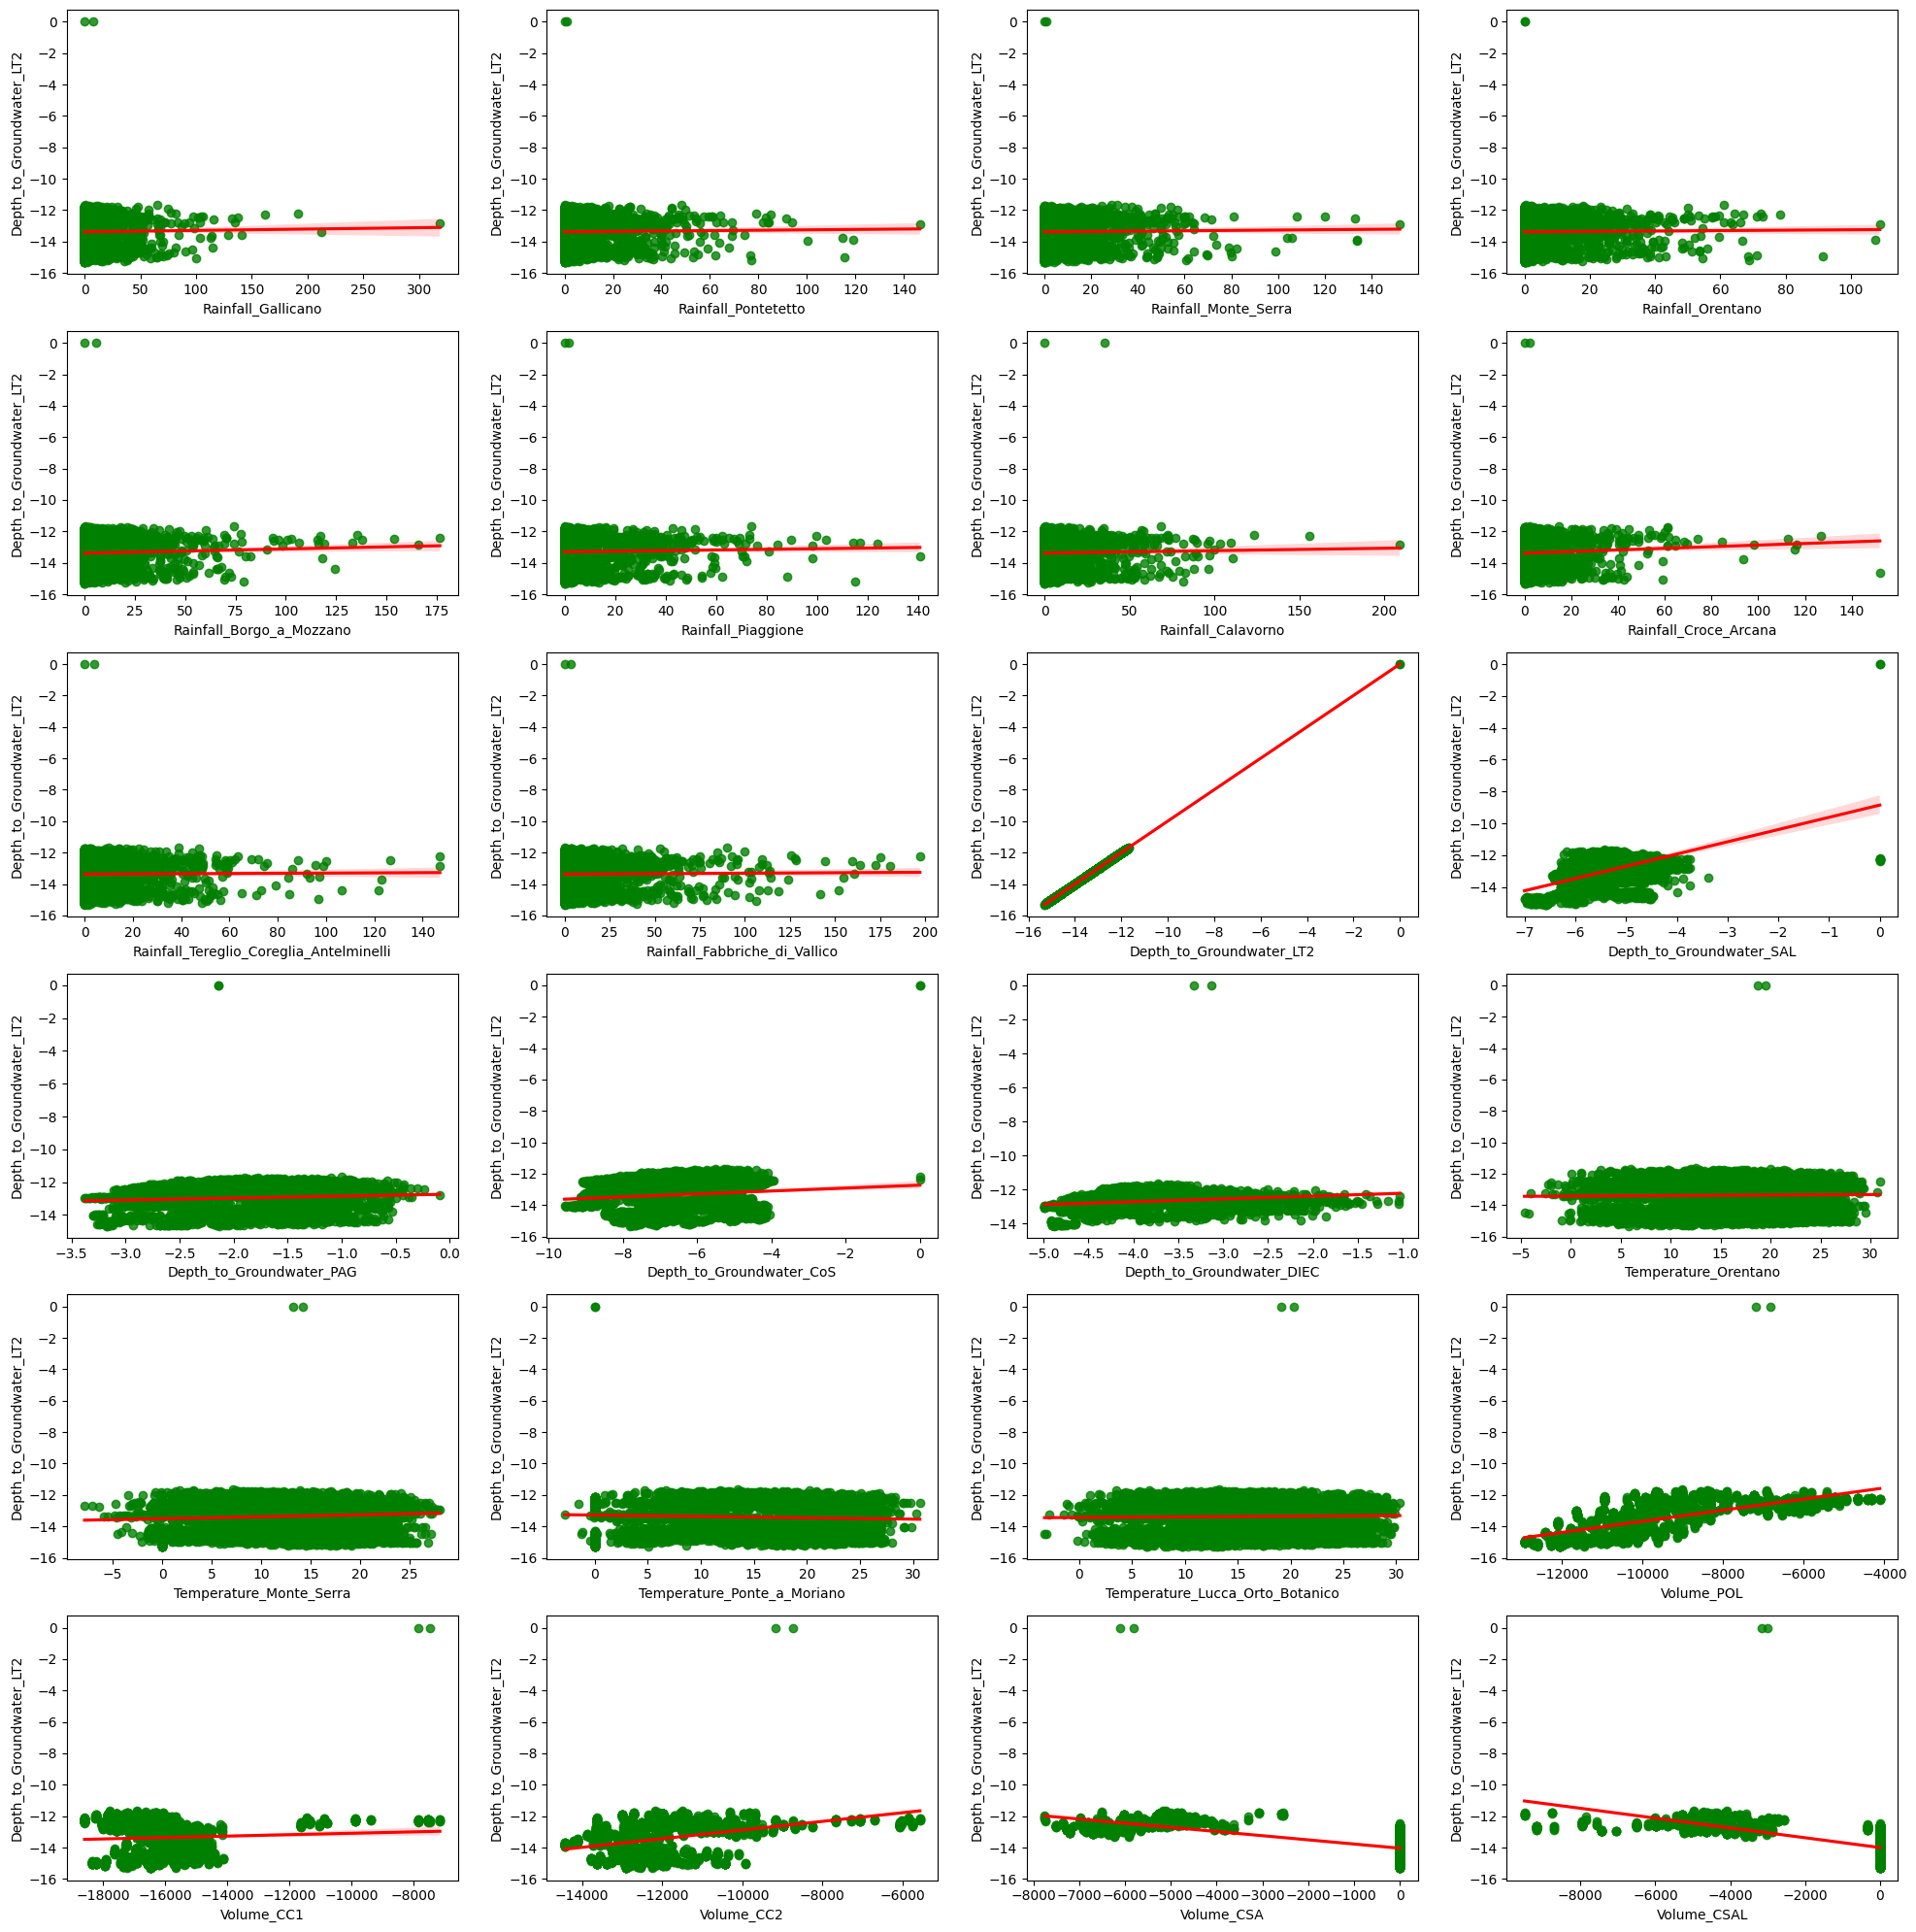

In [ ]:
# plotting each variable with DtG LT2: 
# Create the subplots
n_rows = 6
n_cols = 4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20, 20)
for i, column in enumerate(no_date.iloc[:,:-2].columns):
    sns.regplot(x = no_date[column], y = no_date['Depth_to_Groundwater_LT2'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()

## Formatting Date column

In [ ]:
auser_raw['Date'] = pd.to_datetime(auser_raw['Date'], format='mixed', dayfirst='True').dt.floor("d")
auser_raw.head(10)

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,1998-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1998-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.95,0.0,6.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1998-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.15,0.0,1.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1998-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.95,0.0,6.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1998-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.40,0.0,9.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1998-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.95,0.0,8.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
auser_raw = auser_raw.set_index('Date')
auser_raw

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
Date,,,,,,,,,,,,,,,,,,,,,
1998-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03


In [ ]:
rainfalls = auser_raw.iloc[: , 0:10]
rainfalls

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico
Date,,,,,,,,,,
1998-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rainfalls_names = list(rainfalls.columns)
rainfalls_names

['Rainfall_Gallicano',
 'Rainfall_Pontetetto',
 'Rainfall_Monte_Serra',
 'Rainfall_Orentano',
 'Rainfall_Borgo_a_Mozzano',
 'Rainfall_Piaggione',
 'Rainfall_Calavorno',
 'Rainfall_Croce_Arcana',
 'Rainfall_Tereglio_Coreglia_Antelminelli',
 'Rainfall_Fabbriche_di_Vallico']

In [ ]:
rainfalls.isnull().sum()

Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2865
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
dtype: int64

In [ ]:
rainfalls.isna().sum()

Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2865
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
dtype: int64

In [ ]:
# Identify days with NaN values in rainfall columns

nan_days = rainfalls[rainfalls[rainfalls_names].isna().any(axis=1)]
print("Days with NaN values in rainfall columns:")
print(nan_days[nan_days.dropna() > 0])

Days with NaN values in rainfall columns:
            Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
Date                                                                        
1998-03-05                 NaN                  NaN                   NaN   
1998-03-06                 NaN                  NaN                   NaN   
1998-03-07                 NaN                  NaN                   NaN   
1998-03-08                 NaN                  NaN                   NaN   
1998-03-09                 NaN                  NaN                   NaN   
...                        ...                  ...                   ...   
2012-02-03                 NaN                  NaN                   NaN   
2012-02-04                 NaN                  NaN                   NaN   
2012-02-10                 NaN                  NaN                   NaN   
2012-02-11                 NaN                  NaN                   NaN   
2012-02-15                 NaN    

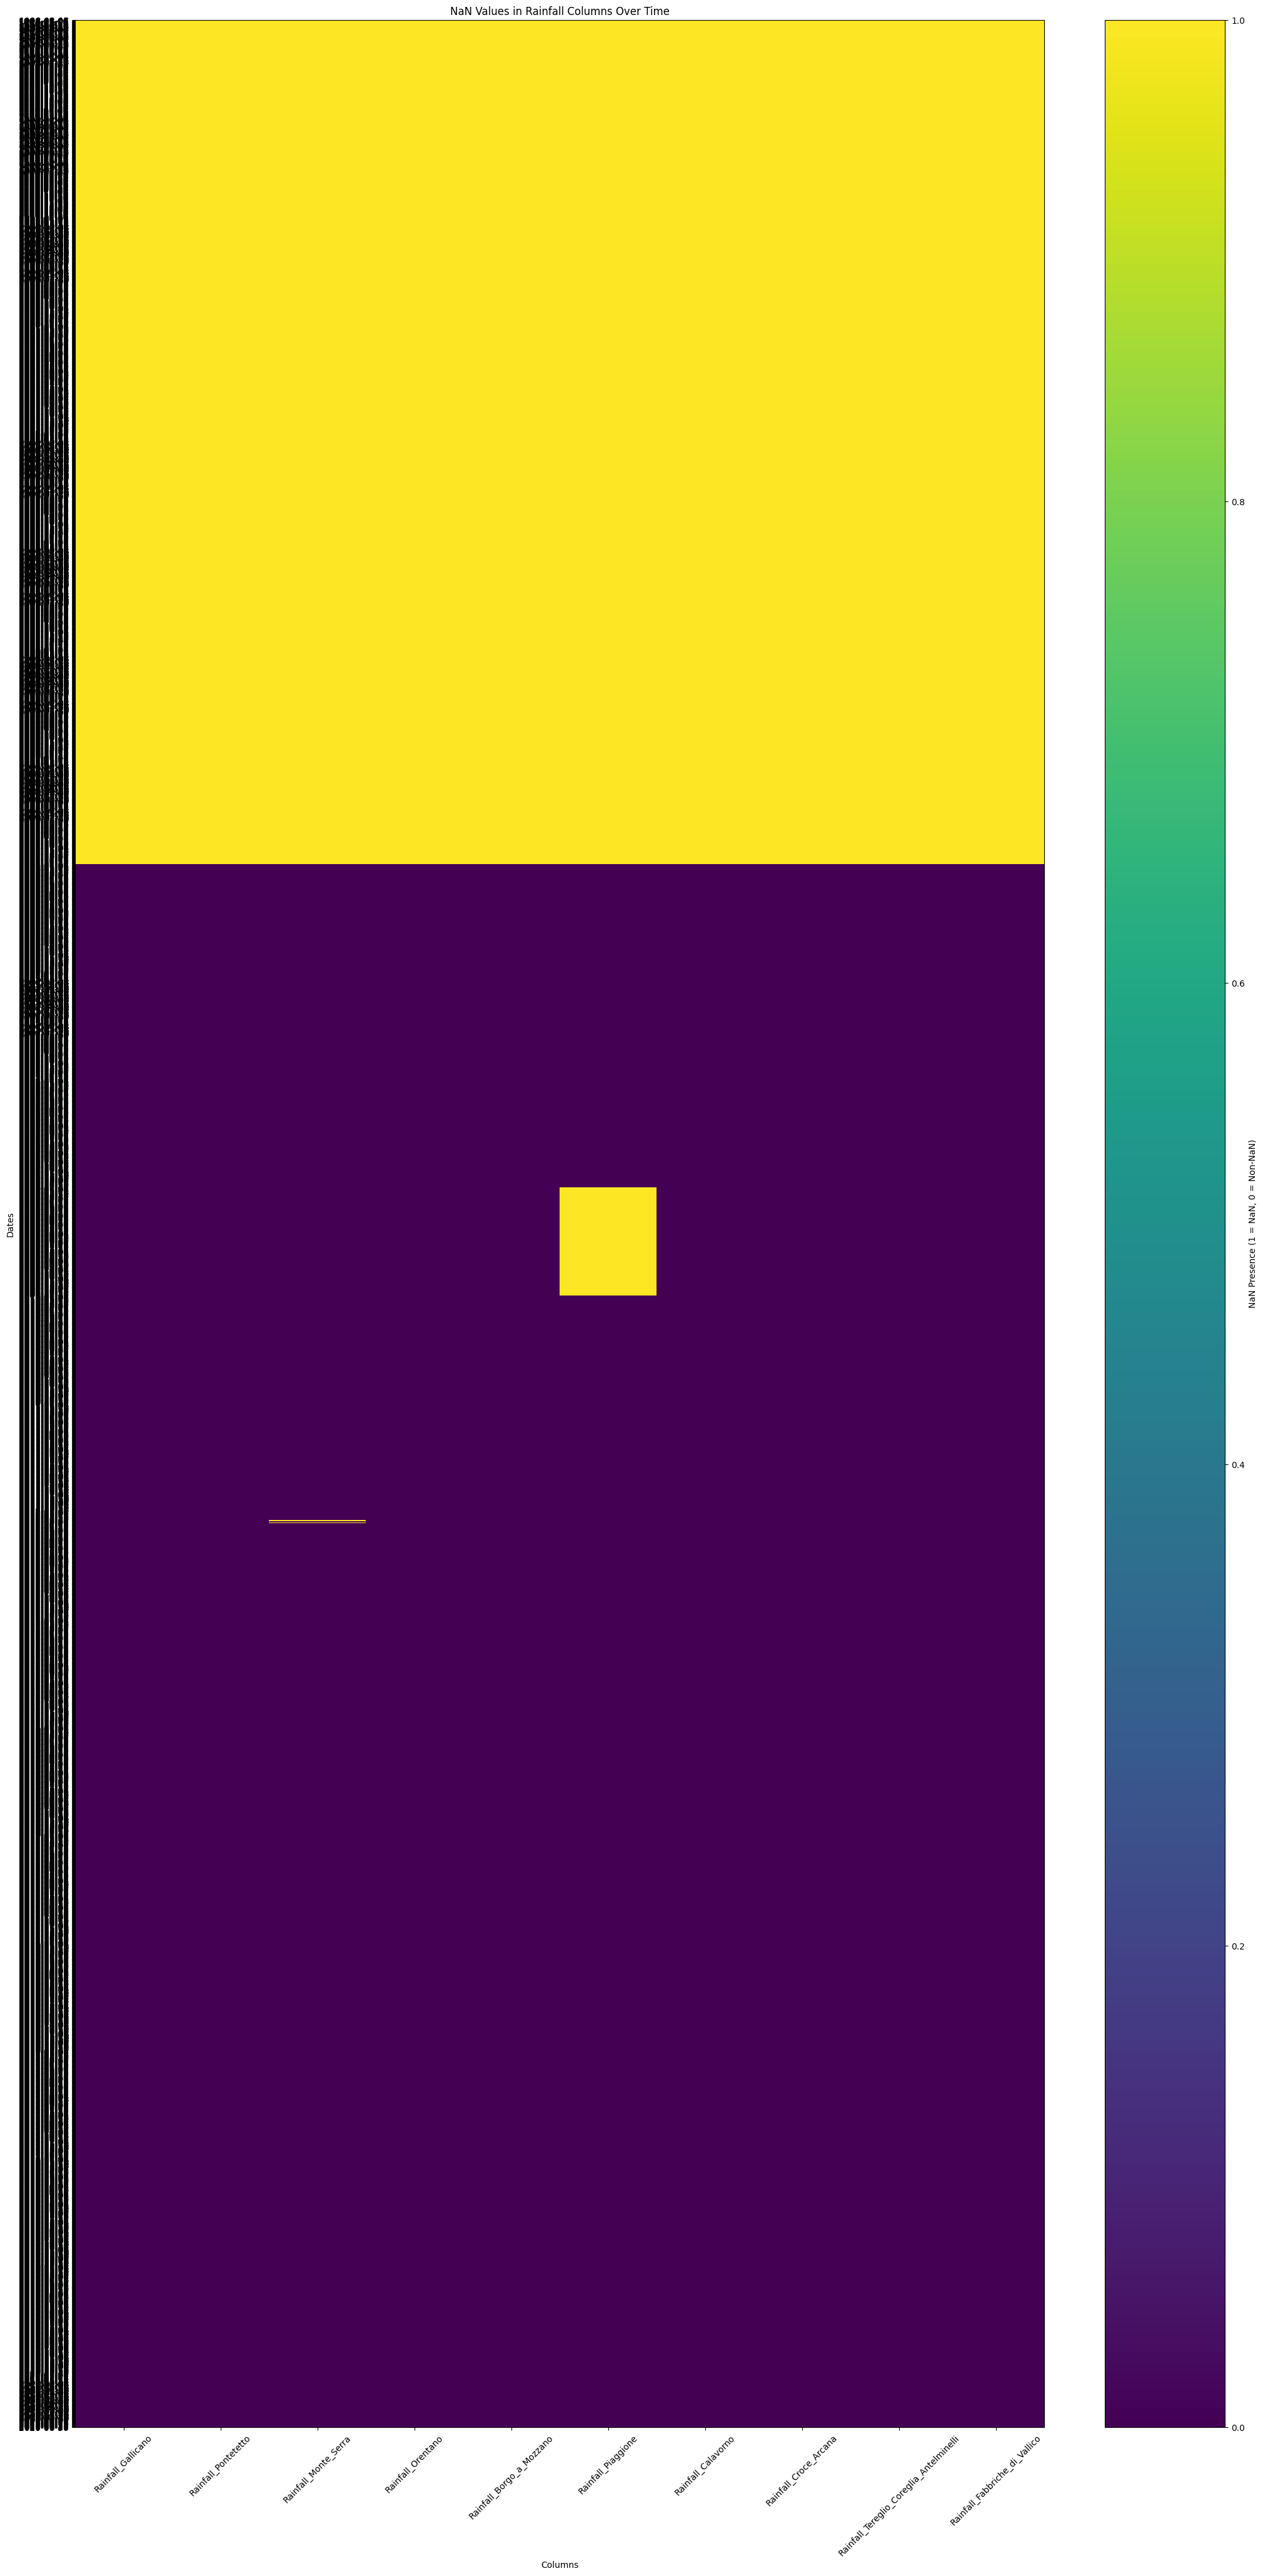

In [ ]:
# Identify NaNs
nan_df = rainfalls[rainfalls_names].isna().astype(int)

# Plot NaNs using a heatmap
plt.figure(figsize=(25, 50))
plt.title("NaN Values in Rainfall Columns Over Time")
plt.xlabel("Columns")
plt.ylabel("Dates")
plt.xticks(ticks=np.arange(len(nan_df.columns)), labels=nan_df.columns, rotation=45)
plt.yticks(ticks=np.arange(len(nan_df.index)), labels=nan_df.index.strftime('%Y-%m-%d'))
plt.imshow(nan_df, cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar(label='NaN Presence (1 = NaN, 0 = Non-NaN)')
plt.show()

In [ ]:
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

auser_raw.shape
auser_raw.isnull().sum()


Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2865
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
Depth_to_Groundwater_LT2                   3352
Depth_to_Groundwater_SAL                   3609
Depth_to_Groundwater_PAG                   4347
Depth_to_Groundwater_CoS                   3839
Depth_to_Groundwater_DIEC                  4884
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                                 2494
Volume_CC1                              